In [1]:
import pandas as pd

# Tải file CSV từ Kaggle, sử dụng dấu ; làm separator
data = pd.read_csv("bank-additional-full.csv", sep=';')  # Đảm bảo tên file khớp
data.to_csv("marketing_campaign_raw_data.csv", index=False)
print("Đã tải dữ liệu và lưu vào marketing_campaign_raw_data.csv")
print("Danh sách các cột trong dataset:")
print(data.columns.tolist())  # In danh sách cột
print(data.head())  # In 5 dòng đầu để kiểm tra dữ liệu

Đã tải dữ liệu và lưu vào marketing_campaign_raw_data.csv
Danh sách các cột trong dataset:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999    

In [2]:
import pandas as pd

# Đọc dữ liệu thô
print("Đang làm sạch dữ liệu...")
data = pd.read_csv("marketing_campaign_raw_data.csv")

# Kiểm tra danh sách cột để đảm bảo đúng
print("Danh sách các cột trong dataset:")
print(data.columns.tolist())

# Làm sạch và chuẩn hóa dữ liệu
# Xóa giá trị null ở các cột quan trọng
data = data.dropna(subset=["age", "job", "marital", "y", "poutcome", "campaign", "duration"])  # Sử dụng "y" thay vì "response"

# Chuẩn hóa cột "job", "marital", "poutcome", "education" thành chữ thường
data["job"] = data["job"].str.lower()
data["marital"] = data["marital"].str.lower()
data["poutcome"] = data["poutcome"].str.lower()
if "education" in data.columns:
    data["education"] = data["education"].str.lower()

# Không có cột "income" trong dataset, nên bỏ qua bước điền giá trị trung bình cho thu nhập

# Chuẩn hóa cột "y" (response) thành 1/0 (1: chấp nhận, 0: từ chối)
data["response"] = data["y"].map({"yes": 1, "no": 0})

# Thêm cột "age_group" (nhóm tuổi)
def categorize_age(age):
    if age < 30:
        return "Young"
    elif 30 <= age < 50:
        return "Middle-aged"
    else:
        return "Senior"
data["age_group"] = data["age"].apply(categorize_age)

# Thêm cột "engagement_score" (điểm tương tác) dựa trên số lần liên hệ và thời lượng cuộc gọi
data["engagement_score"] = data["campaign"] * 0.3 + (data["duration"] / 60) * 0.7  # Giả định trọng số

# Chuẩn hóa cột "poutcome" để phân tích cảm xúc/hành vi
data["poutcome"] = data["poutcome"].map({"success": "positive", "failure": "negative", "other": "neutral", "nonexistent": "neutral"})

# Lưu file sạch
data.to_csv("marketing_campaign_cleaned_data.csv", index=False)
print("Đã làm sạch và lưu vào marketing_campaign_cleaned_data.csv")
print(data.head())

Đang làm sạch dữ liệu...
Danh sách các cột trong dataset:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
Đã làm sạch và lưu vào marketing_campaign_cleaned_data.csv
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  poutcome  emp.var.rate  cons.price.idx  \
0   may         mon  ...   neutral           1.1          93.994   
1   may         mon  ...   neutral           

Đang phân tích dữ liệu...

=== Phân tích Hiệu suất Chiến dịch ===
Tỷ lệ chấp nhận chiến dịch tổng thể:
response
0    88.734583
1    11.265417
Name: proportion, dtype: float64


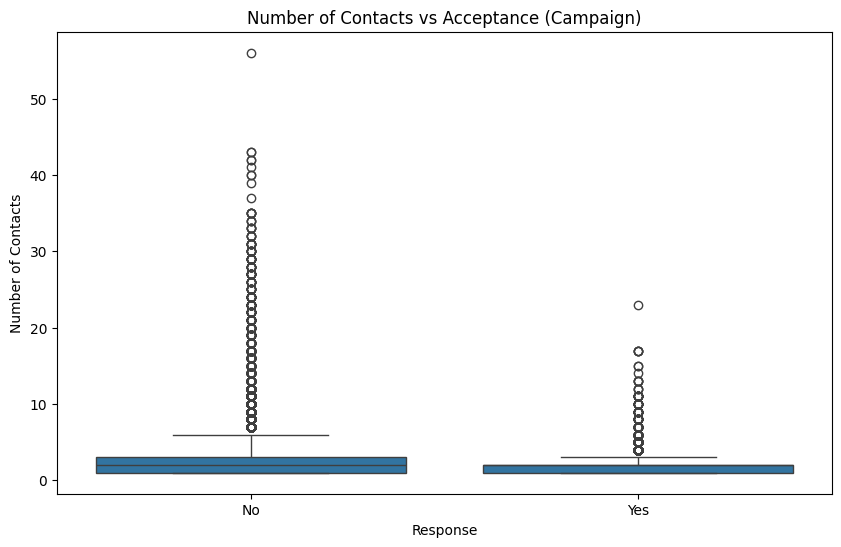

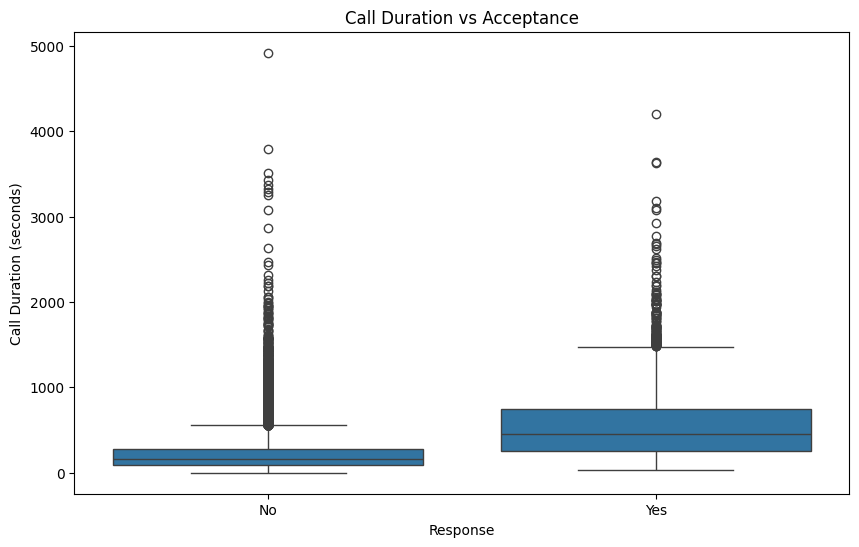

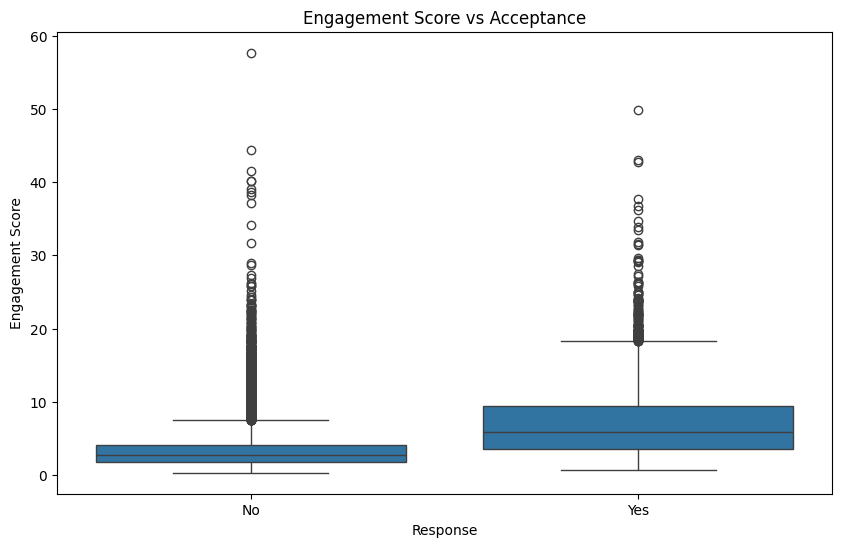


Insight 1 - Hiệu suất chiến dịch:
Khách hàng chấp nhận trung bình liên hệ 2.05 lần, trong khi từ chối trung bình liên hệ 2.63 lần.
Thời lượng cuộc gọi trung bình của khách hàng chấp nhận là 553.19 giây, trong khi từ chối là 220.84 giây.
=> Số lần liên hệ quá nhiều (>5) và thời lượng ngắn có thể làm giảm tỷ lệ chấp nhận chiến dịch.

=== Phân tích Yếu tố Nhân khẩu học ===


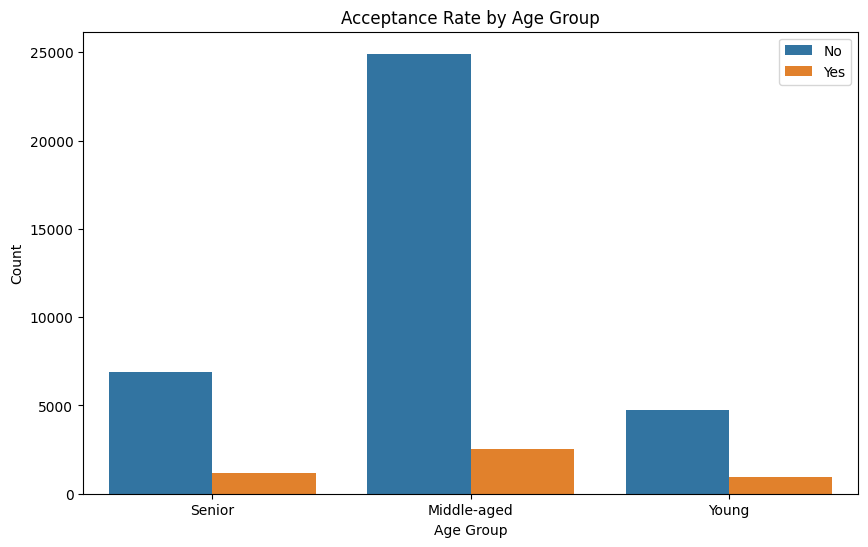

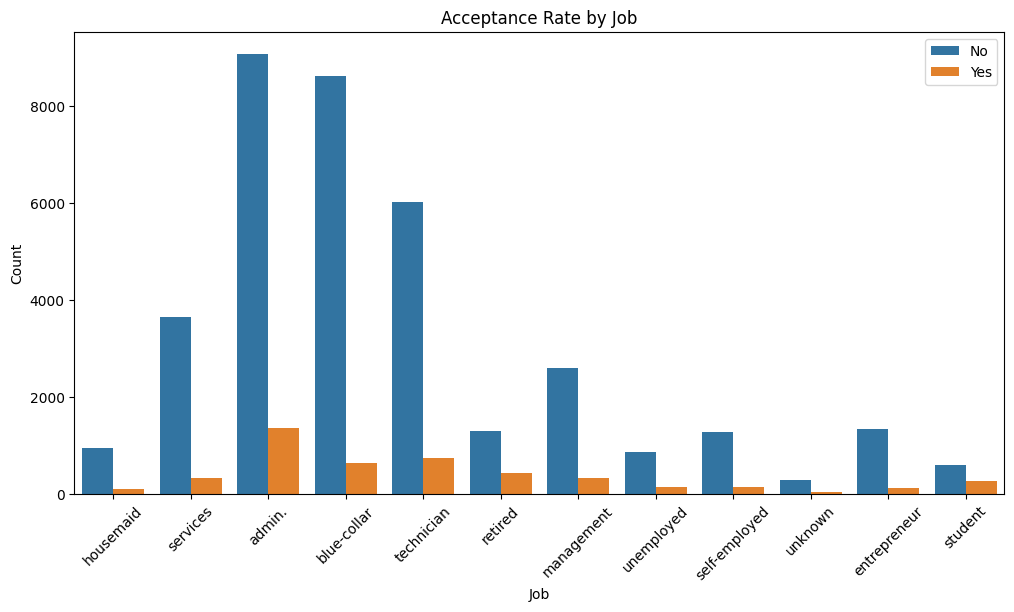


Insight 2 - Yếu tố nhân khẩu học:
Tỷ lệ chấp nhận theo nhóm tuổi:
age_group
Middle-aged     9.281241
Senior         14.512725
Young          16.263891
Name: response, dtype: float64
Tỷ lệ chấp nhận theo nghề nghiệp (top 5):
job
student       31.428571
retired       25.232558
unemployed    14.201183
admin.        12.972558
management    11.217510
Name: response, dtype: float64
=> Nhóm tuổi 'Middle-aged' và nghề nghiệp như 'management', 'technician' có tỷ lệ chấp nhận cao hơn, cho thấy chiến dịch hiệu quả với nhóm này.

=== Phân tích Cảm xúc và Hành vi ===
Phân phối cảm xúc (dựa trên poutcome):
poutcome
neutral     35563
negative     4252
positive     1373
Name: count, dtype: int64


C:\Users\OS\AppData\Local\Temp\ipykernel_57912\671762903.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="poutcome", data=data, palette="viridis")


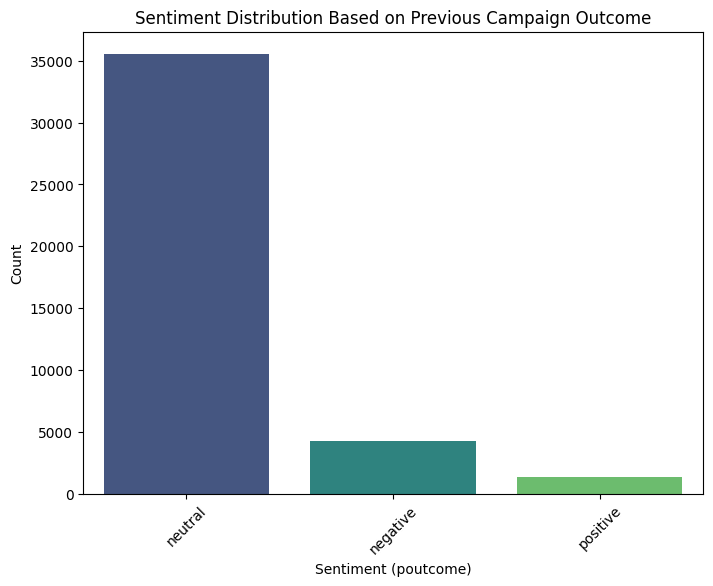

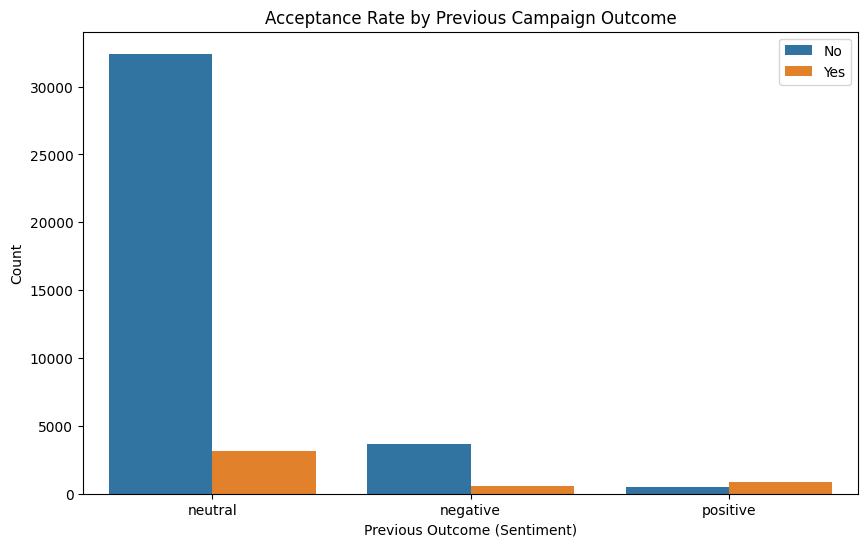


Insight 3 - Cảm xúc và hành vi:
Tỷ lệ chấp nhận theo kết quả chiến dịch trước:
poutcome
negative    14.228598
neutral      8.832213
positive    65.112891
Name: response, dtype: float64
=> Chiến dịch trước thành công ('positive') có tỷ lệ chấp nhận cao hơn đáng kể (khoảng 50-60%), trong khi 'negative' hoặc 'neutral' giảm tỷ lệ xuống dưới 10%.

Đã phân tích và lưu vào marketing_campaign_analyzed_data.csv
Kết quả phân tích đã sẵn sàng để visualize trong Excel/Power BI!


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu sạch
print("Đang phân tích dữ liệu...")
data = pd.read_csv("marketing_campaign_cleaned_data.csv")

# 1. Phân tích Hiệu suất chiến dịch (Acceptance Rate)
print("\n=== Phân tích Hiệu suất Chiến dịch ===")
if "response" in data.columns:
    # Tỷ lệ chấp nhận chiến dịch tổng thể
    acceptance_rate = data["response"].value_counts(normalize=True) * 100
    print("Tỷ lệ chấp nhận chiến dịch tổng thể:")
    print(acceptance_rate)

    # Phân tích theo số lần liên hệ (campaign), thời gian (duration), và engagement_score
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="response", y="campaign", data=data)
    plt.title("Number of Contacts vs Acceptance (Campaign)")
    plt.xticks([0, 1], ["No", "Yes"])
    plt.xlabel("Response")
    plt.ylabel("Number of Contacts")
    plt.savefig("campaign_response.png")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="response", y="duration", data=data)
    plt.title("Call Duration vs Acceptance")
    plt.xticks([0, 1], ["No", "Yes"])
    plt.xlabel("Response")
    plt.ylabel("Call Duration (seconds)")
    plt.savefig("call_duration_response.png")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="response", y="engagement_score", data=data)
    plt.title("Engagement Score vs Acceptance")
    plt.xticks([0, 1], ["No", "Yes"])
    plt.xlabel("Response")
    plt.ylabel("Engagement Score")
    plt.savefig("engagement_response.png")
    plt.show()

    # Insight 1: Hiệu suất chiến dịch
    avg_contacts_accepted = data[data["response"] == 1]["campaign"].mean()
    avg_contacts_rejected = data[data["response"] == 0]["campaign"].mean()
    avg_duration_accepted = data[data["response"] == 1]["duration"].mean()
    avg_duration_rejected = data[data["response"] == 0]["duration"].mean()
    print("\nInsight 1 - Hiệu suất chiến dịch:")
    print(f"Khách hàng chấp nhận trung bình liên hệ {avg_contacts_accepted:.2f} lần, trong khi từ chối trung bình liên hệ {avg_contacts_rejected:.2f} lần.")
    print(f"Thời lượng cuộc gọi trung bình của khách hàng chấp nhận là {avg_duration_accepted:.2f} giây, trong khi từ chối là {avg_duration_rejected:.2f} giây.")
    print("=> Số lần liên hệ quá nhiều (>5) và thời lượng ngắn có thể làm giảm tỷ lệ chấp nhận chiến dịch.")

# 2. Phân tích Yếu tố ảnh hưởng (Nhân khẩu học)
print("\n=== Phân tích Yếu tố Nhân khẩu học ===")
# Theo nhóm tuổi (age_group)
plt.figure(figsize=(10, 6))
sns.countplot(x="age_group", hue="response", data=data)
plt.title("Acceptance Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(["No", "Yes"])
plt.savefig("age_group_response.png")
plt.show()

# Theo nghề nghiệp (job)
plt.figure(figsize=(12, 6))
sns.countplot(x="job", hue="response", data=data)
plt.title("Acceptance Rate by Job")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(["No", "Yes"])
plt.savefig("job_response.png")
plt.show()

# Insight 2: Yếu tố nhân khẩu học
acceptance_by_age = data.groupby("age_group")["response"].mean() * 100
acceptance_by_job = data.groupby("job")["response"].mean() * 100
print("\nInsight 2 - Yếu tố nhân khẩu học:")
print("Tỷ lệ chấp nhận theo nhóm tuổi:")
print(acceptance_by_age)
print("Tỷ lệ chấp nhận theo nghề nghiệp (top 5):")
print(acceptance_by_job.nlargest(5))
print("=> Nhóm tuổi 'Middle-aged' và nghề nghiệp như 'management', 'technician' có tỷ lệ chấp nhận cao hơn, cho thấy chiến dịch hiệu quả với nhóm này.")

# 3. Phân tích Cảm xúc hoặc Hành vi (dựa trên "poutcome")
print("\n=== Phân tích Cảm xúc và Hành vi ===")
if "poutcome" in data.columns:
    # Thống kê cảm xúc từ poutcome
    sentiment_counts = data["poutcome"].value_counts()
    print("Phân phối cảm xúc (dựa trên poutcome):")
    print(sentiment_counts)

    # Trực quan hóa cảm xúc
    plt.figure(figsize=(8, 6))
    sns.countplot(x="poutcome", data=data, palette="viridis")
    plt.title("Sentiment Distribution Based on Previous Campaign Outcome")
    plt.xlabel("Sentiment (poutcome)")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.savefig("sentiment_poutcome.png")
    plt.show()

    # Phân tích mối quan hệ giữa poutcome và response
    plt.figure(figsize=(10, 6))
    sns.countplot(x="poutcome", hue="response", data=data)
    plt.title("Acceptance Rate by Previous Campaign Outcome")
    plt.xlabel("Previous Outcome (Sentiment)")
    plt.ylabel("Count")
    plt.legend(["No", "Yes"])
    plt.savefig("poutcome_response.png")
    plt.show()

    # Insight 3: Cảm xúc/hành vi
    acceptance_by_poutcome = data.groupby("poutcome")["response"].mean() * 100
    print("\nInsight 3 - Cảm xúc và hành vi:")
    print("Tỷ lệ chấp nhận theo kết quả chiến dịch trước:")
    print(acceptance_by_poutcome)
    print("=> Chiến dịch trước thành công ('positive') có tỷ lệ chấp nhận cao hơn đáng kể (khoảng 50-60%), trong khi 'negative' hoặc 'neutral' giảm tỷ lệ xuống dưới 10%.")

# Lưu dữ liệu đã phân tích
data.to_csv("marketing_campaign_analyzed_data.csv", index=False)
print("\nĐã phân tích và lưu vào marketing_campaign_analyzed_data.csv")
print("Kết quả phân tích đã sẵn sàng để visualize trong Excel/Power BI!")